### Predict fuel efficiency:
In a regression problem, the aim is to predict the output of a continuous value, like a price or a probability. Here,  I use [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) dataset and demonstrates how to build models to predict the fuel efficiency of the late-1970s and early 1980s automobiles.

Steps:
1. Prepare the data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras

##### 1. Data preposessing:
Attribute Information

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
dataset=raw_dataset.copy()

In [4]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


2. clean data

In [5]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
dataset=dataset.dropna()
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

3. Convert Categorical Data

In [7]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='', dtype=int)
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


4. Split the data into training and test sets

In [8]:
train_dataset = dataset.sample(frac=.08, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

5. Inspect the Data

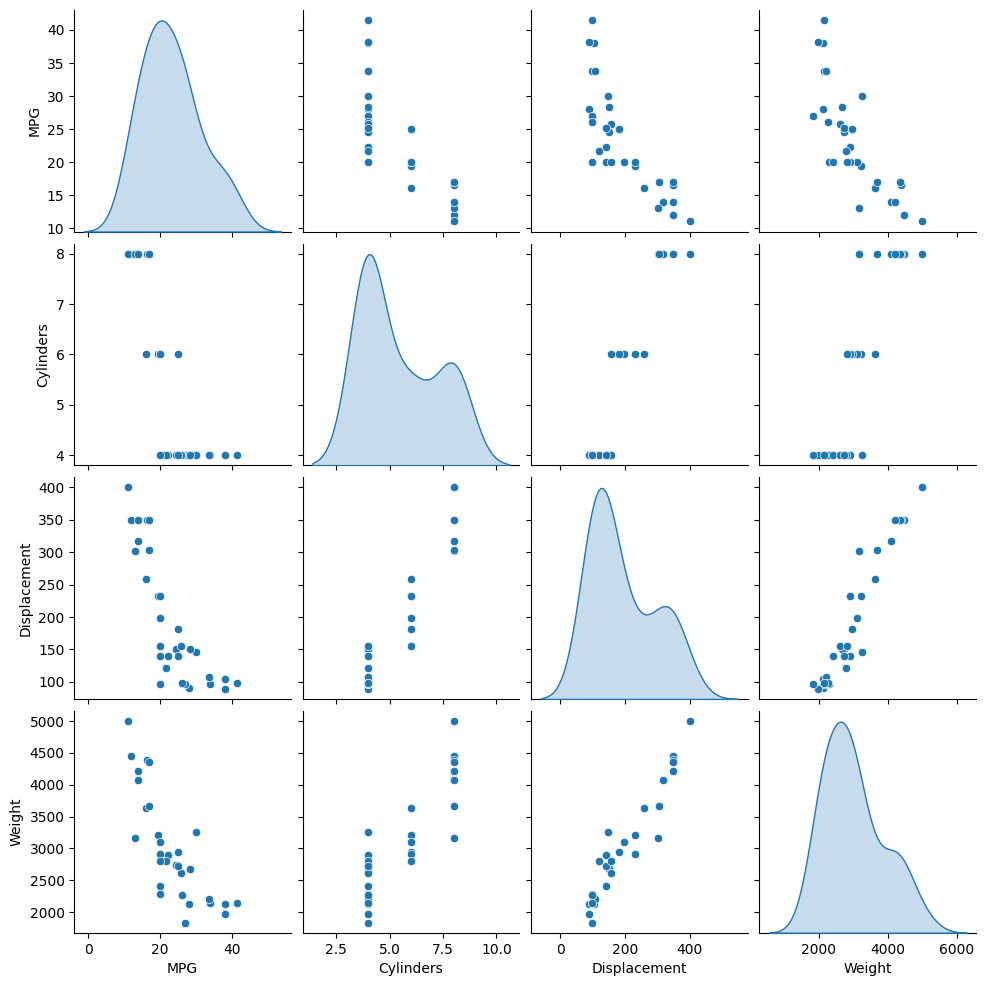

In [9]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [10]:
print(dataset.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose()

(392, 10) (31, 10) (361, 10)


,count,mean,std,min,25%,50%,75%,max
MPG,31.0,23.180645,8.008138,11.0,16.95,21.6,27.50,41.5
Cylinders,31.0,5.419355,1.727700,4.0,4.00,4.0,7.00,8.0
Displacement,31.0,193.677419,98.833661,89.0,106.00,151.0,280.00,400.0
Horsepower,31.0,104.451613,34.411082,60.0,82.00,90.0,125.50,180.0
Weight,31.0,3003.806452,845.280917,1834.0,2272.00,2807.0,3441.00,4997.0
Acceleration,31.0,15.687097,2.455299,11.5,14.20,15.5,17.25,21.8
Model Year,31.0,76.258065,3.595995,71.0,73.00,76.0,79.50,82.0
Europe,31.0,0.161290,0.373878,0.0,0.00,0.0,0.00,1.0
Japan,31.0,0.161290,0.373878,0.0,0.00,0.0,0.00,1.0
USA,31.0,0.677419,0.475191,0.0,0.00,1.0,1.00,1.0


6. ***Normalized the data:***<br>
The `tf.keras.layers.Normalization` is a clean and simple way to add feature normalization into your model.This layer will shift and scale inputs into a distribution centered around 0 with standard deviation 1.
`tf.keras.layers.Normalization(axis, mean, varience, invert)`

In [ ]:
normalizer = tf.keras.layers.Normalization()

In [19]:
adapt_data = np.array([[0., 7., 4.],
                       [2., 9., 6.],
                       [0., 7., 4.],
                       [2., 9., 6.]], dtype='float32')
input_data = np.array([[0., 7., 4.]], dtype='float32')
layer = tf.keras.layers.Normalization(axis=-1, invert= True)
layer.adapt(adapt_data)
# layer(input_data)
print(layer(adapt_data))

tf.Tensor(
[[ 1. 15.  9.]
 [ 3. 17. 11.]
 [ 1. 15.  9.]
 [ 3. 17. 11.]], shape=(4, 3), dtype=float32)


In [18]:
adapt_data = np.array([[0., 7., 4.],
                       [2., 9., 6.],
                       [0., 7., 4.],
                       [2., 9., 6.]], dtype='float32')
input_data = np.array([[1., 2., 3.]], dtype='float32')
layer = tf.keras.layers.Normalization(axis=-1, invert=True)
layer.adapt(adapt_data)
layer(input_data)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 2., 10.,  8.]], dtype=float32)>